In this script the literature-based marker panel was establised and analyzed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import seaborn as sns
import scanpy as sc
from itertools import product
import anndata as ad
sc.logging.print_versions()
import plotly.graph_objects as go
import scanpy.external.pp
from matplotlib.colors import LinearSegmentedColormap

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                 9.4.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           0.8.3
h5py                3.9.0
hypergeom_ufunc     NA
igraph              0.10.8
invgauss_ufunc      NA
ipykernel           6.25.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.40.1
louvain             0.8.1
matplotlib          3.7.2
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.4.0
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
numba               0.57.1
numexpr             2.8.4
numpy               1.24.3
packaging           23.1
pandas              2.0.3
parso            

In [2]:
# reading batch corrected adata object
data_path = 'C:/Users/Helene/Documents/Master_Thesis/TabulaMurisSenis/Data/droplet_liver_angela.h5ad'
adata = ad.read_h5ad(data_path)

In [3]:
# change the index of the adata object
adata.var = adata.var.set_index('feature_name')
tempAdata = adata.raw.to_adata()
tempAdata.var_names = adata.var_names
adata.raw = tempAdata

# exclude first time point
adata = adata[adata.obs['age'] != '1m']

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:887: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [4]:
# marker lists
marker_list = ['Il1a', 'Il1b','Il6', 'Cxcl15' , 'Il18','Ccl2', 'Tnf', 'Ifng', 'Tgfb1','Cxcl1', 'Cxcl12' ] # paper 217 (general)
marker_list = ['Il1b', 'Il6', 'Il10', 'Tnf', 'Cxcl2', 'Ccl2'] # paper 90 (liver)
marker_list = ['Il6', 'Csf2', 'Cxcl1', 'Igfbp2', 'Il1b'] # paper 58 (prostate epithelial cells)
marker_list = ['Mki67','Bhlhe40', 'Cdkn2a', 'Cdkn1a', 'Trp53', 'Rad17', 'Atr', 'Atm', 'Mdc1', 'Tyro3' , 'Hira', 'Igf2', 'Igfbp3', 'Igfbp5', 'Igfbp7', 'Stc1', 'Gdf15', 'Icam1', 'Ptprj', 'Notch3', 'Lmnb1'] # paper 122, general markers

all_marker_list = ['Mki67','Bhlhe40', 'Cdkn2a', 'Cdkn1a', 'Trp53', 'Rad17', 'Atr', 'Atm', 'Mdc1', 'Tyro3' , 'Hira', 'Igf2', 'Igfbp3', 'Igfbp5', 'Igfbp7', 'Stc1', 'Gdf15', 'Icam1', 'Ptprj', 'Notch3' ,'Il6', 'Csf2', 'Cxcl1', 'Igfbp2', 'Il1b', 'Il1b', 'Il6', 'Il10', 'Tnf', 'Cxcl2', 'Ccl2', 'Il1a', 'Il1b','Il6', 'Cxcl15' , 'Il18','Ccl2', 'Tnf', 'Ifng', 'Tgfb1','Cxcl1', 'Cxcl12', 'Lmnb1']
all_marker_list1 = ['Mki67','Bhlhe40', 'Cdkn2a', 'Cdkn1a', 'Trp53', 'Rad17', 'Atr', 'Atm', 'Mdc1', 'Tyro3' , 'Hira', 'Igf2', 'Igfbp3', 'Igfbp5', 'Igfbp7', 'Stc1', 'Gdf15','Icam1',  ]
all_marker_list2 = ['Ptprj', 'Notch3' ,'Il6','Csf2', 'Cxcl1', 'Igfbp2', 'Il1b', 'Il1b', 'Il6', 'Il10', 'Tnf', 'Cxcl2', 'Ccl2', 'Il1a', 'Il1b','Il6', 'Cxcl15' , 'Il18','Ccl2', 'Tnf', 'Ifng', 'Tgfb1','Cxcl1', 'Cxcl12', 'Lmnb1']

all_marker_list1 = list(set(all_marker_list1))
all_marker_list2 = list(set(all_marker_list2))

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


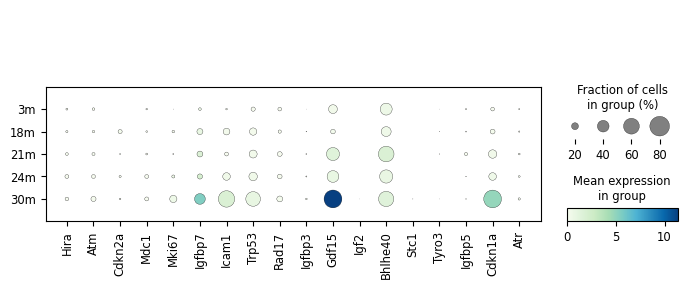

In [5]:
#plotting
colors = [(0, '#5C3C85'), (0.17, '#6E78A2'), (0.33, '#91B0CF'), (0.5, '#7ABEBC'),(0.66, '#7CB296'), (0.83, '#BDDC7A'),(1, '#DFE67E')]  # Format: (position, color)
cmap_name = 'gradual_color_map'
gradual_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

scanpy.pl.dotplot(adata, all_marker_list1 , groupby= 'age', cmap = 'GnBu') 

Decrease the size of the marker panel

In [6]:
overlap = None 
subset = adata.copy()
lap_list = ['Tgfb1', 'Il18', 'Trp53', 'Igfbp2','Cdkn1a', 'Bhlhe40', 'Gdf15', 'Il1b', 'Ptprj', 'Icam1'] #round 1
lap_list = ['Tgfb1', 'Il18', 'Trp53', 'Cdkn1a','Bhlhe40', 'Gdf15', 'Il1b', 'Ptprj', 'Icam1'] # round 2
lap_list = ['Tgfb1', 'Il18', 'Cdkn1a', 'Bhlhe40', 'Gdf15', 'Il1b', 'Ptprj', 'Icam1'] # round 3
lap_list = ['Tgfb1', 'Il18', 'Cdkn1a', 'Gdf15', 'Il1b', 'Ptprj', 'Icam1'] # round 4
lap_list = ['Tgfb1', 'Il18', 'Cdkn1a', 'Gdf15', 'Il1b', 'Ptprj'] # round 5
lap_list = ['Tgfb1', 'Il18', 'Cdkn1a', 'Gdf15', 'Il1b' ] # round 6
lap_list = ['Tgfb1', 'Il18', 'Cdkn1a', 'Gdf15', 'Il1b' ] # round 7


for marker in lap_list:
    marker_filter = subset[:, subset.var_names== marker]
    marker_positive = marker_filter[marker_filter.X > 0]
    print(marker, len(marker_positive))
    if overlap is None:
        overlap = marker_positive
    else:
        overlap = overlap[overlap.obs.index.isin(marker_positive.obs.index)]
    
print('Overlapping cells: ', len(overlap))

Tgfb1 2506
Il18 1952
Cdkn1a 1897
Gdf15 2201
Il1b 2217
Overlapping cells:  1242
